In [1]:
library(ggplot2)
library(tidyverse)
library(viridis)
library(viridisLite)
library(readxl)
library(ggpubr)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite



In [2]:
dir()

[1] "antibody.ipynb"                       
 [2] "antibody.svg"                         
 [3] "antibody.xlsx"                        
 [4] "CD4-8.ipynb"                          
 [5] "CD4CD8 T cells.svg"                   
 [6] "CD4CD8.xlsx"                          
 [7] "complement.ipynb"                     
 [8] "complement.svg"                       
 [9] "complement.xls"                       
[10] "complement.xlsx"                      
[11] "complement111.svg"                    
[12] "correlation_c4bp_factorH.svg"         
[13] "cytokines.ipynb"                      
[14] "cytokines.svg"                        
[15] "data.xls"                             
[16] "data.xlsx"                            
[17] "factor h.svg"                         
[18] "full_complement.svg"                  
[19] "gene expression_without_outliers.xlsx"
[20] "gene expression.xlsx"                 
[21] "gene expressions.ipynb"               
[22] "gene_expression.svg"                  
[23] "inflammatory cytokines.xlsx"          
[24] "MetaboAnalystR"                       
[25] "notitle.png"                          
[26] "pheatmap.svg"                         
[27] "pheatmap2.svg"                        
[28] "pheatmap3333.svg"                     
[29] "pheatmap4444.svg"                     
[30] "plot4.png"                            
[31] "R-4.1.0-1-1.x86_64.rpm"               
[32] "RcppArmadillo_0.9.900.3.0.tar.gz"     
[33] "Untitled.ipynb"                       
[34] "Untitled1.ipynb"

In [5]:
cytokines <- read_excel("data.xlsx", sheet = "inflammatory cytokines")
head(cytokines)

animal,groups,treatment,replicate,items,concentrate
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
A01,A,control,0,IL-1α,70.38344
A01,A,control,1,IL-1α,70.61400
A01,A,control,2,IL-1α,72.88669
A02,A,control,0,IL-1α,74.73119
A02,A,control,1,IL-1α,77.72850
A02,A,control,2,IL-1α,73.90775


In [8]:
cytokines$replicate <- as.factor(cytokines$replicate)
head(cytokines)

animal,groups,treatment,replicate,items,concentrate
<chr>,<chr>,<chr>,<fct>,<chr>,<dbl>
A01,A,control,0,IL-1α,70.38344
A01,A,control,1,IL-1α,70.61400
A01,A,control,2,IL-1α,72.88669
A02,A,control,0,IL-1α,74.73119
A02,A,control,1,IL-1α,77.72850
A02,A,control,2,IL-1α,73.90775


In [9]:
my_comparisons <- list(c("control", "AMUP"),c("Normal","Disease"))
cytokines$treatment <- factor(cytokines$treatment, levels=c("control", "AMUP", "Normal", "Disease"))

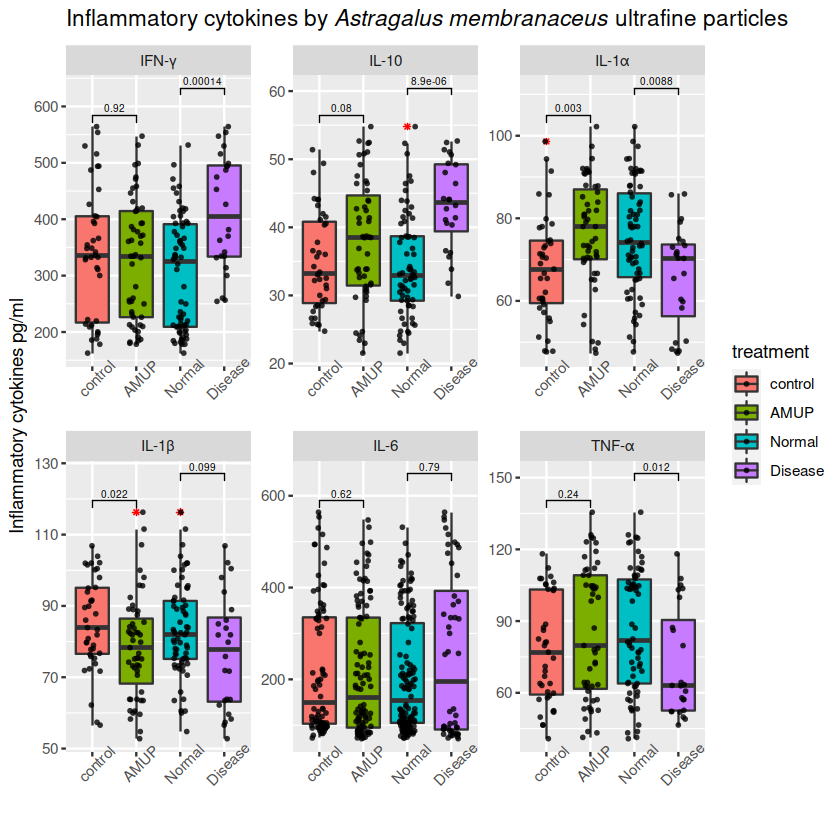

In [13]:
p_cytokines <- ggplot(cytokines, aes(x=treatment, y=concentrate, fill=treatment)) +
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size =1) +
    geom_jitter(shape=16, size=1, position = position_jitter(0.18), alpha = 0.8) +
    stat_compare_means(comparisons = my_comparisons, size=2, exact = FALSE) + # add pairwise comparison
#     stat_compare_means()  + # add global p-value
    labs(title = expression(paste("Inflammatory cytokines by ",italic("Astragalus membranaceus"), " ultrafine particles")),
#         subtitle = "(limited to characters with more than 100 appearances)",
        y = "Inflammatory cytokines（pg/ml）", x = "") +
    theme(axis.text.x = element_text(angle=45)) +
    facet_wrap(~items, scales="free", nrow=2)
p_cytokines

In [14]:
svg("cytokines.svg")
p_cytokines
dev.off()

png 
  2